In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Random")
Pkg.add("CairoMakie")
Pkg.add("Statistics")
Pkg.add("Distributions")
Pkg.add("LinearAlgebra")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Dow

Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter8\Project.toml`
  [13f3f980] CairoMakie v0.12.5
⌃ [31c24e10] Distributions v0.25.109
⌃ [6099a3de] PythonCall v0.9.21
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
  [10745b16] Statistics v1.10.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
# # Translated from Matlab to Julia

# using Random, CairoMakie

# Random.seed!(1234)

# mu = 2
# sigma = 1

# Xzero = 1

# T = 1
# N = 100
# dt = T/N

# Xpath = zeros(N+1)
# Xem = zeros(N+1)

# Xpath[1] = Xzero
# Xem[1] = Xzero

# for j in 1:N
#     Winc = sqrt(dt) * randn()
#     Xpath[j + 1] = Xpath[j]*exp((mu - 0.5*sigma^2)*dt + sigma*Winc)
#     Xem[j + 1] = Xem[j] + mu*Xem[j]*dt + sigma*Xem[j]*Winc
# end

# fig = Figure(resolution = (600, 400))

# ax = Axis(fig[1, 1], xlabel = "t", ylabel = "X")

# lines!(ax, 0:dt:T, Xpath, color = :blue, linewidth = 2, label = "Exact path")
# lines!(ax, 0:dt:T, Xem, color = :red, linewidth = 2, label = "Euler-Maruyama")

# fig

In [3]:
# print(abs(Xem[end] - Xpath[end]))

In [4]:
# # Weak convergence of the Euler-Maruyama method

# using Random, CairoMakie, Statistics, Distributions

# # Random.seed!(1234)

# mu = 2
# sigma = 0.1

# Xzero = 1

# T = 1
# N = 2^9
# dt = T/N

# reps = 10^4
# decreasing_number = 5


# dW = sqrt(dt) * randn(BigFloat, (reps, N))
# # dW = sqrt(dt) * rand(Uniform(-1, 1), reps, N)
# # dW = sqrt(dt) * rand(Normal(0, 1), reps, N)
# W = cumsum(dW, dims = 2)

# Xpath = zeros(BigFloat, reps, N+1)
# Xpath[:, 1] .= Xzero

# Xem = Dict()

# for i in 1:decreasing_number
#     Xem[i - 1] = zeros(BigFloat, reps, N÷2^(i-1)+1)
# end

# for i in 1:N
#     Xpath[:, i + 1] .= Xpath[:, i].*exp.((mu .- 0.5*sigma^2)*dt .+ sigma*dW[:, i])
# end

# for i in 1:decreasing_number
#     Xem[i - 1][:, 1] .= Xzero

#     dWTemp = zeros(reps, N÷2^(i-1))

#     for j in 0:2^(i-1)-1
#         dWTemp .+= dW[:, j+1:2^(i-1):end]
#     end

#     for j in 1:N÷2^(i-1)
#         Xem[i - 1][:, j + 1] .= Xem[i - 1][:, j] .+ mu*Xem[i - 1][:, j]*dt*2^(i-1) .+ sigma*Xem[i - 1][:, j].*dWTemp[:, j]
#     end
# end

# expectedPathEnd = mean(Xpath[:, end])
# error = zeros(BigFloat, decreasing_number)
# errorExact = zeros(BigFloat, decreasing_number)

# for i in 1:decreasing_number
#     error[i] = abs(mean(Xem[i - 1][:, end]) - expectedPathEnd)
#     errorExact[i] = abs(mean(Xem[i - 1][:, end]) - exp(mu * T))
# end

# log2_error = log2.(error)
# log2_errorExact = log2.(errorExact)

# fig = Figure(resolution = (600, 400))

# ax = Axis(fig[1, 1], xlabel = "log2(dt)", ylabel = "log2(error)")

# lines!(ax, Int(log2(dt)):decreasing_number-1+Int(log2(dt)), log2_error, color = :blue, linewidth = 2)
# # scatter!(ax, Int(log2(dt)):decreasing_number-1+Int(log2(dt)), log2_error, color = :blue)
# lines!(ax, Int(log2(dt)):decreasing_number-1+Int(log2(dt)), log2_errorExact, color = :green, linewidth = 2)
# lines!(ax, Int(log2(dt)):decreasing_number-1+Int(log2(dt)), Int(log2(dt)):decreasing_number-1+Int(log2(dt)), color = :red, linewidth = 2)

# fig

In [5]:
# # Least square

# using LinearAlgebra

# A = hcat(ones(decreasing_number), Int(log2(dt)):decreasing_number-1+Int(log2(dt)))
# b = log2_error
# bExact = log2_errorExact

# x = A \ b
# xExact = A \ bExact

# println("The slope is ", x[2])
# println("The intercept is ", x[1])
# println("The residual is ", norm(A*x - b))
# println("The slope (using exact expected) is ", xExact[2])
# println("The intercept (using exact expected) is ", xExact[1])
# println("The residual (using exact expected) is ", norm(A*xExact - bExact))
# println("The diff between exact and computed end point is ", abs(expectedPathEnd - exp(mu*T)))

In [6]:
# # Strong convergence of the Euler-Maruyama method

# using Random, CairoMakie, Statistics

# Random.seed!(1234)

# mu = 2
# sigma = 1

# Xzero = 1

# T = 1
# N = 2^11
# dt = T/N

# reps = 5000
# decreasing_number = 6

# dW = sqrt(dt) * randn(reps, N)
# W = cumsum(dW, dims = 2)

# Xpath = zeros(reps, N+1)
# Xpath[:, 1] .= Xzero

# Xem = Dict()

# for i in 1:decreasing_number
#     Xem[i - 1] = zeros(reps, N÷2^(i-1)+1)
# end

# for i in 1:N
#     Xpath[:, i + 1] .= Xpath[:, i].*exp.((mu .- 0.5*sigma^2)*dt .+ sigma*dW[:, i])
# end

# for i in 1:decreasing_number
#     Xem[i - 1][:, 1] .= Xzero

#     dWTemp = zeros(reps, N÷2^(i-1))

#     for j in 0:2^(i-1)-1
#         dWTemp .+= dW[:, j+1:2^(i-1):end]
#     end

#     for j in 1:N÷2^(i-1)
#         Xem[i - 1][:, j + 1] .= Xem[i - 1][:, j] .+ mu*Xem[i - 1][:, j]*dt*2^(i-1) .+ sigma*Xem[i - 1][:, j].*dWTemp[:, j]
#     end
# end

# expectedError = zeros(decreasing_number)
# for i in 1:decreasing_number
#     error = abs.(Xem[i - 1][:, end] .- Xpath[:, end])
#     expectedError[i] = mean(error)
# end

# log2_expectedError = log2.(expectedError)

# fig = Figure(resolution = (600, 400))

# ax = Axis(fig[1, 1], xlabel = "log2(dt)", ylabel = "log2(error)")

# lines!(ax, -11:decreasing_number-1-11, log2_expectedError, color = :blue, linewidth = 2)
# lines!(ax, -11:decreasing_number-1-11, -11:decreasing_number-1-11, color = :red, linewidth = 2)

# fig

In [7]:
# # Least square

# using LinearAlgebra

# A = hcat(ones(decreasing_number), -11:decreasing_number-1-11)
# b = log2_expectedError

# x = A \ b

# println("The slope is ", x[2])
# println("The intercept is ", x[1])
# println("The residual is ", norm(A*x - b))

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\rEu75\src\scenes.jl:227


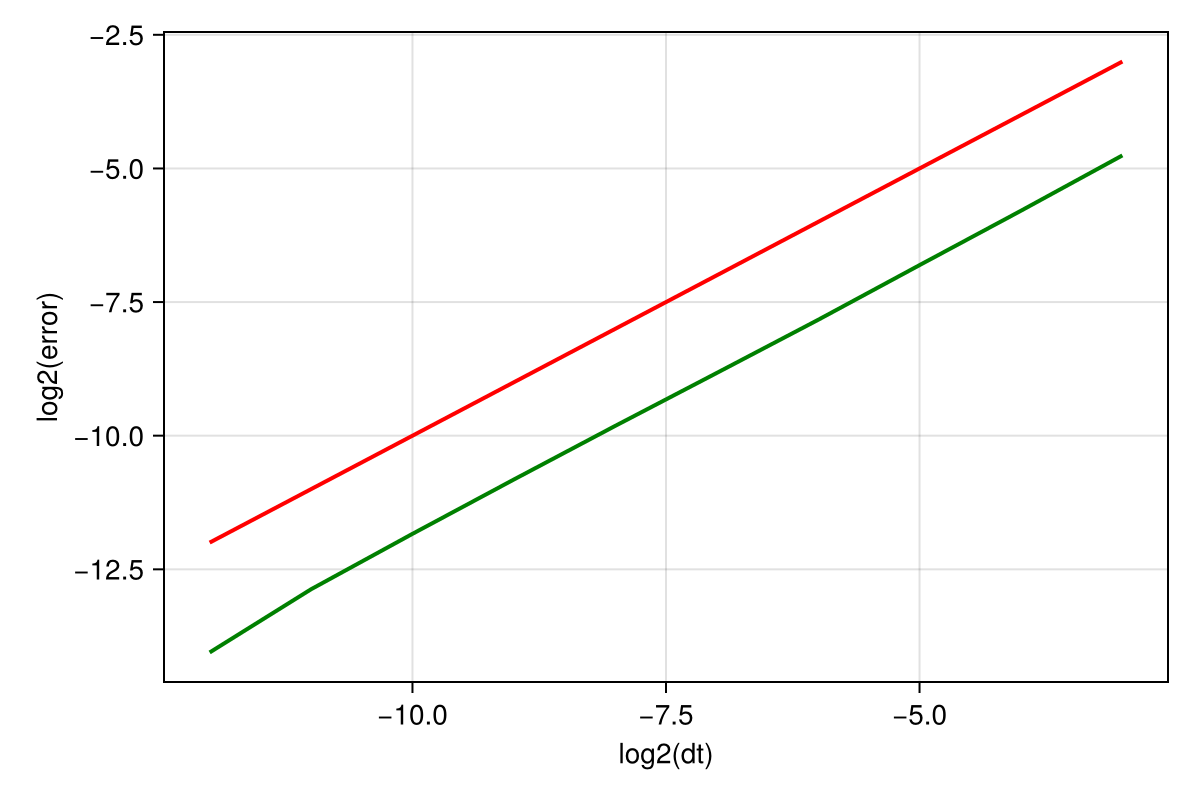

In [8]:
# Strong convergence of the Euler-Maruyama method (Ornstein-Uhlenbeck process with mu = 0)

using Random, CairoMakie, Statistics

Random.seed!(1234)

mu = 0
sigma = 1
theta = 1

Xzero = 1

T = 1
N = 2^12
dt = T/N

reps = 10000
decreasing_number = 10

dW = sqrt(dt) * randn(reps, N)

Xem = Dict()

for i in 1:decreasing_number
    Xem[i - 1] = zeros(reps, N÷2^(i-1)+1)
end

# Xpath = zeros(reps, N+1)
# Xpath[:, 1] .= Xzero
# integral = transpose(exp.(theta * (0:dt:T-dt))) .* dW
# Xpath[:, 2:end] .= Xpath[:, 1] * transpose(exp.(-theta*(dt:dt:T))) .+ transpose(mu*(1 .- exp.(-theta*(dt:dt:T)))) .+ sigma * cumsum(integral, dims = 2) .* transpose(exp.(-theta * (dt:dt:T)))

Xpath0 = zeros(reps, N+1)
Xpath0[:, 1] .= Xzero
for i in 1:N
    Xpath0[:, i + 1] = Xpath0[:, i] * exp(-theta*dt) .+ mu * (1 - exp(-theta*dt)) .+ sigma * sqrt((1 - exp(-2*theta*dt))/(2*theta)) * dW[:, i] / sqrt(dt)
    # Xpath0[:, i + 1] = Xpath0[:, i] * exp(-theta*dt) .+ mu * (1 - exp(-theta*dt)) .+ sigma * exp(-theta*i*dt) * exp(theta*(i-1)*dt) * dW[:, i]
end

for i in 1:decreasing_number
    Xem[i - 1][:, 1] .= Xzero

    dWTemp = zeros(reps, N÷2^(i-1))

    for j in 0:2^(i-1)-1
        dWTemp .+= dW[:, j+1:2^(i-1):end]
    end

    for j in 1:N÷2^(i-1)
        Xem[i - 1][:, j + 1] .= Xem[i - 1][:, j] .+ theta*(mu .- Xem[i - 1][:, j])*dt*2^(i-1) .+ sigma.*dWTemp[:, j]
    end
end

# expectedError = zeros(decreasing_number)
expectedError0 = zeros(decreasing_number)
for i in 1:decreasing_number
    # error = abs.(Xem[i - 1][:, end] .- Xpath[:, end])
    # expectedError[i] = mean(error)

    error0 = abs.(Xem[i - 1][:, end] .- Xpath0[:, end])
    expectedError0[i] = mean(error0)
end

# log2_expectedError = log2.(expectedError)
log2_expectedError0 = log2.(expectedError0)

fig = Figure(resolution = (600, 400))

ax = Axis(fig[1, 1], xlabel = "log2(dt)", ylabel = "log2(error)")

# lines!(ax, Int(log2(dt)):decreasing_number-1+Int(log2(dt)), log2_expectedError, color = :blue, linewidth = 2)
lines!(ax, Int(log2(dt)):decreasing_number-1+Int(log2(dt)), log2_expectedError0, color = :green, linewidth = 2)
lines!(ax, Int(log2(dt)):decreasing_number-1+Int(log2(dt)), Int(log2(dt)):decreasing_number-1+Int(log2(dt)), color = :red, linewidth = 2)

fig


# # Plot OUProcess

# fig = Figure(resolution = (600, 400))

# ax = Axis(fig[1, 1], xlabel = "t", ylabel = "X")

# lines!(ax, 0:dt:T, Xpath[10, :], color = :blue, linewidth = 2, label = "Exact path")
# lines!(ax, 0:dt*2^(0):T, Xem[0][10, :], color = :red, linewidth = 2, label = "Euler-Maruyama")

# fig

In [9]:
# Least square

using LinearAlgebra

A = hcat(ones(decreasing_number), Int(log2(dt)):decreasing_number-1+Int(log2(dt)))
# b = log2_expectedError
b_0 = log2_expectedError0

# x = A \ b
x_0 = A \ b_0

# println("The slope (cumsum integral) is ", x[2])
# println("The intercept (cumsum integral) is ", x[1])
# println("The residual (cumsum integral) is ", norm(A*x - b))
println("The slope (loop integral) is ", x_0[2])
println("The intercept (loop integral) is ", x_0[1])
println("The residual (loop integral) is ", norm(A*x_0 - b_0))

The slope (loop integral) is 1.0203471082550646
The intercept (loop integral) is -1.6888724653210627
The residual (loop integral) is 0.15813459010758935
